In [1]:
# Import necessary library
import pandas as pd


# Reload the data from the CSV file
data = pd.read_csv("collapsed_company_data_no_nan_normalized.csv")

In [2]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense


In [3]:
# Define features and target variable
features = [
    'ENVIRON_DISCLOSURE_SCORE',
    'SOCIAL_DISCLOSURE_SCORE',
    'GOVNCE_DISCLOSURE_SCORE',
    'ESG_DISCLOSURE_SCORE'
]
target = 'EBITDA_CAGR'

In [4]:
X = data[features].values
y = data[target].values

X = np.reshape(X, (X.shape[0], 1, X.shape[1]))


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Function to create the model
def create_model(units, dropout_rate):
    model = Sequential()
    model.add(LSTM(units, input_shape=(X.shape[1], X.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Grid search parameters
units_options = [50, 100]
dropout_options = [0.1, 0.2, 0.3]
batch_size_options = [16, 32]
epochs_options = [50, 100]

best_score = np.inf
best_params = {}

for units in units_options:
    for dropout_rate in dropout_options:
        for batch_size in batch_size_options:
            for epochs in epochs_options:
                print(f"Training model with units={units}, dropout={dropout_rate}, batch_size={batch_size}, epochs={epochs}")

                # Create model
                model = create_model(units, dropout_rate)

                # Split training data for validation
                X_train_part, X_val, y_train_part, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

                # Train the model
                model.fit(X_train_part, y_train_part, epochs=epochs, batch_size=batch_size, verbose=0)

                # Predict on validation set
                val_predictions = model.predict(X_val)
                val_mse = mean_squared_error(y_val, val_predictions)

                # Check if this is the best score
                if val_mse < best_score:
                    best_score = val_mse
                    best_params = {'units': units, 'dropout_rate': dropout_rate, 'batch_size': batch_size, 'epochs': epochs}

print("Best Score (MSE):", best_score)
print("Best Parameters:", best_params)


Training model with units=50, dropout=0.1, batch_size=16, epochs=50
13/13 [==============================] - 0s 2ms/step
Training model with units=50, dropout=0.1, batch_size=16, epochs=100
13/13 [==============================] - 0s 2ms/step
Training model with units=50, dropout=0.1, batch_size=32, epochs=50
13/13 [==============================] - 0s 2ms/step
Training model with units=50, dropout=0.1, batch_size=32, epochs=100
13/13 [==============================] - 0s 2ms/step
Training model with units=50, dropout=0.2, batch_size=16, epochs=50
13/13 [==============================] - 0s 2ms/step
Training model with units=50, dropout=0.2, batch_size=16, epochs=100
13/13 [==============================] - 0s 2ms/step
Training model with units=50, dropout=0.2, batch_size=32, epochs=50
13/13 [==============================] - 0s 2ms/step
Training model with units=50, dropout=0.2, batch_size=32, epochs=100
13/13 [==============================] - 0s 2ms/step
Training model with units=50

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# Creating the model with the identified best parameters
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.3))  # Adding the dropout layer with dropout rate 0.3
model.add(LSTM(units=50))  # Adding another LSTM layer
model.add(Dense(1))  # Output layer for prediction

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model with the best parameters
model.fit(X, y, epochs=100, batch_size=16, verbose=2)


Epoch 1/100
128/128 - 4s - loss: 0.0305 - 4s/epoch - 33ms/step
Epoch 2/100
128/128 - 1s - loss: 0.0053 - 587ms/epoch - 5ms/step
Epoch 3/100
128/128 - 1s - loss: 0.0050 - 516ms/epoch - 4ms/step
Epoch 4/100
128/128 - 1s - loss: 0.0047 - 624ms/epoch - 5ms/step
Epoch 5/100
128/128 - 1s - loss: 0.0045 - 581ms/epoch - 5ms/step
Epoch 6/100
128/128 - 1s - loss: 0.0045 - 540ms/epoch - 4ms/step
Epoch 7/100
128/128 - 1s - loss: 0.0044 - 558ms/epoch - 4ms/step
Epoch 8/100
128/128 - 1s - loss: 0.0042 - 575ms/epoch - 4ms/step
Epoch 9/100
128/128 - 1s - loss: 0.0043 - 623ms/epoch - 5ms/step
Epoch 10/100
128/128 - 1s - loss: 0.0042 - 814ms/epoch - 6ms/step
Epoch 11/100
128/128 - 1s - loss: 0.0041 - 990ms/epoch - 8ms/step
Epoch 12/100
128/128 - 1s - loss: 0.0042 - 827ms/epoch - 6ms/step
Epoch 13/100
128/128 - 1s - loss: 0.0042 - 907ms/epoch - 7ms/step
Epoch 14/100
128/128 - 1s - loss: 0.0042 - 974ms/epoch - 8ms/step
Epoch 15/100
128/128 - 1s - loss: 0.0041 - 894ms/epoch - 7ms/step
Epoch 16/100
128/128 

In [8]:
model.save('new_lstm_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
from keras.models import load_model

# Load the model
model = load_model('new_lstm_model.h5')


In [10]:
# Upload the dataset
from google.colab import files


test_data = pd.read_csv("normalized_Collapsed_SME_FAME_BCorp.csv")

test_features = test_data[features].values
test_target = test_data['EBITDA_CAGR'].values

In [39]:
test_data[test_data['EBITDA_CAGR']>5].head()

Empty DataFrame
Columns: [Company name, ESG_DISCLOSURE_SCORE, SOCIAL_DISCLOSURE_SCORE, ENVIRON_DISCLOSURE_SCORE, GOVNCE_DISCLOSURE_SCORE, Year, EBITDA_CAGR]
Index: []

In [11]:
test_features_reshaped = np.expand_dims(test_features, axis=1)

# Make predictions with the model
predictions = model.predict(test_features_reshaped)

2/2 [==============================] - 1s 8ms/step


In [12]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_target, predictions)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.06558830316584847


In [13]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error

mse = mean_squared_error(test_target, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_target, predictions)
r2 = r2_score(test_target, predictions)
mape = mean_absolute_percentage_error(test_target, predictions)

print(f"MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R^2: {r2}, MAPE: {mape}")


MSE: 0.06558830316584847, RMSE: 0.2561021342469611, MAE: 0.2451872718311503, R^2: -2.290248054378423, MAPE: 40125268036386.94


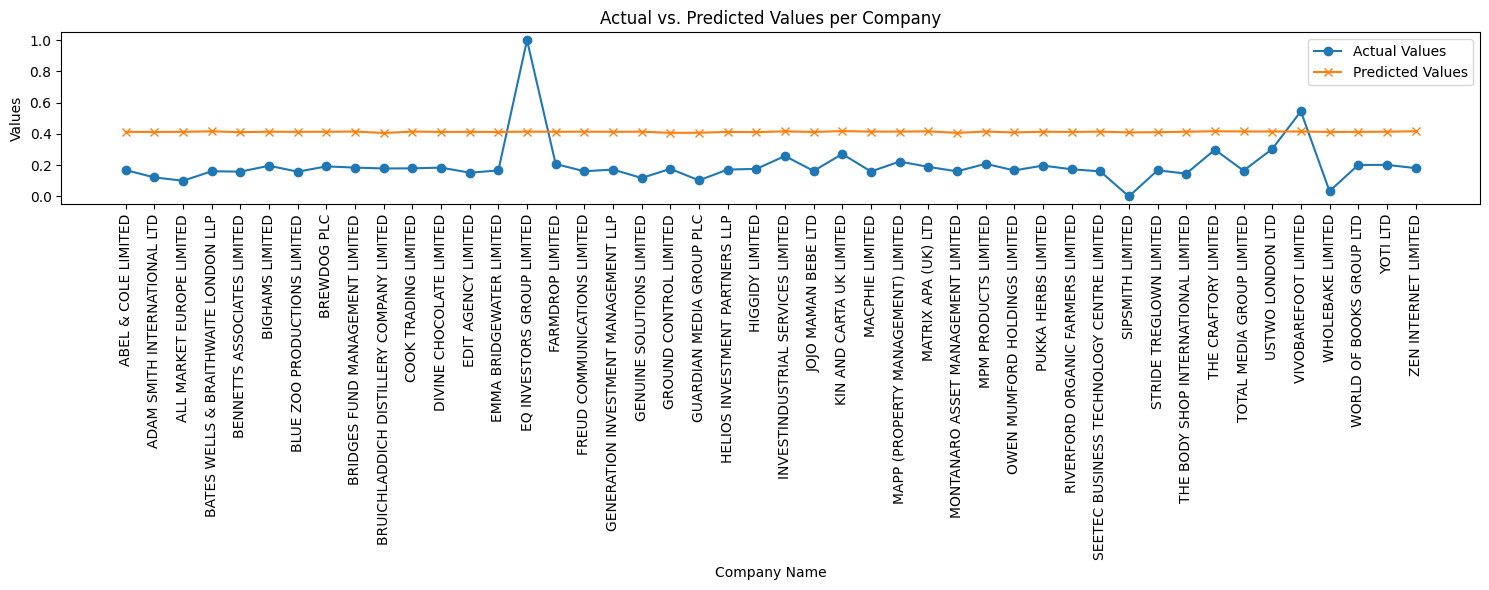

In [14]:
import matplotlib.pyplot as plt

company_names = test_data['Company name']

plt.figure(figsize=(15, 6))
plt.plot(company_names, test_target, label='Actual Values', marker='o')
plt.plot(company_names, predictions, label='Predicted Values', marker='x')
plt.xticks(rotation=90)
plt.title('Actual vs. Predicted Values per Company')
plt.xlabel('Company Name')
plt.ylabel('Values')
plt.legend()
plt.tight_layout()
plt.show()
